Business Scenario
A consumer goods company promotes its product using multiple advertising channels:
Television (TV)
Radio
Newspaper
The company wants to understand:
“How do different advertising channels together influence product sales?”
They also want to predict future sales based on planned advertising budgets.
You are appointed as a Data Analyst to analyze the data and build a predictive model.
📝 Tasks
Load the dataset and examine the available columns.
Use TV, Radio, and Newspaper advertising spends as input features.
Use Sales as the target variable.
Build a model that learns the relationship between advertising spends and sales.
Train the model using historical data.
Predict sales for unseen data points.
Predict sales when the advertising budget is:
TV = 150
Radio = 20
Newspaper = 30
Evaluate the model’s prediction error.
Interpret the coefficients of the model:
Which advertising medium has the strongest impact on sales?
Which medium has the least impact?
Visualize:
Actual sales vs predicted sales
Based on your analysis, suggest:
One business recommendation to improve sales
One technical improvement to improve prediction accuracy
 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df=pd.read_csv(r"C:\Users\91934\OneDrive\Desktop\AI&DS-Tekworks\Machine_learning\advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.describe()


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
print('Dataset shape:', df.shape)

Dataset shape: (200, 4)


In [12]:
# Separate features and target
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values
print('\nFeature preview (first 5 rows):')
print(X[:5])


Feature preview (first 5 rows):
[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]]


In [13]:
# 2) Fit Model - Code
# Splitting into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
print('Training samples:', X_train.shape[0])
print('Test samples:', X_test.shape[0])
 
# Train the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
print('Intercept:', regressor.intercept_)
print('Number of coefficients:', len(regressor.coef_))
 

Training samples: 160
Test samples: 40
Intercept: 4.773205203269839
Number of coefficients: 3


In [14]:
# 3) Predict - Code
# Predicting Test set results
y_pred = regressor.predict(X_test)
 
# Compare Actual vs Predicted
comparison = pd.DataFrame({
    'Actual Profit': y_test,
    'Predicted Profit': np.round(y_pred,2)
})
display(comparison.reset_index(drop=True))

,Actual Profit,Predicted Profit
0,11.3,10.71
1,8.4,8.69
2,12.0,9.58
3,25.4,24.86
4,16.7,14.66
5,8.7,8.32
6,7.2,10.43
7,18.2,18.45
8,9.2,9.73
9,16.6,17.93


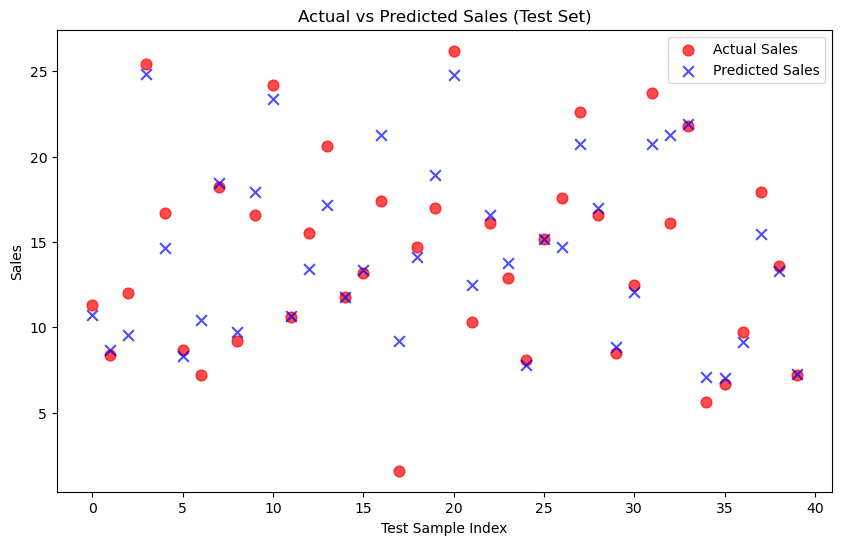

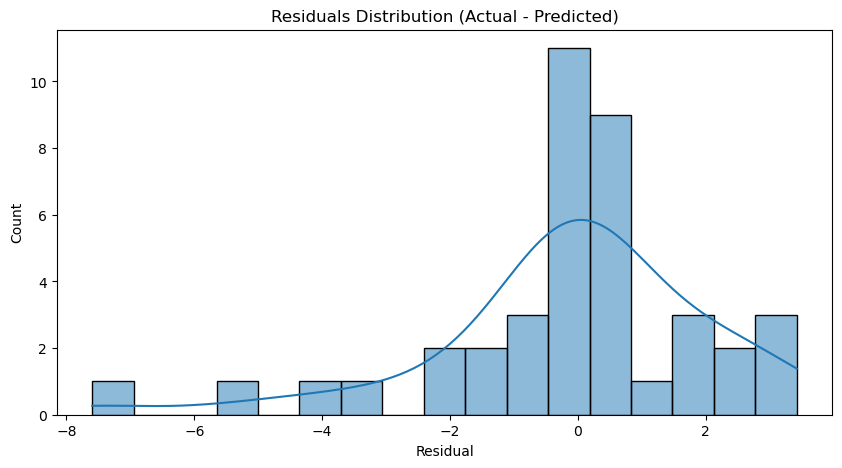

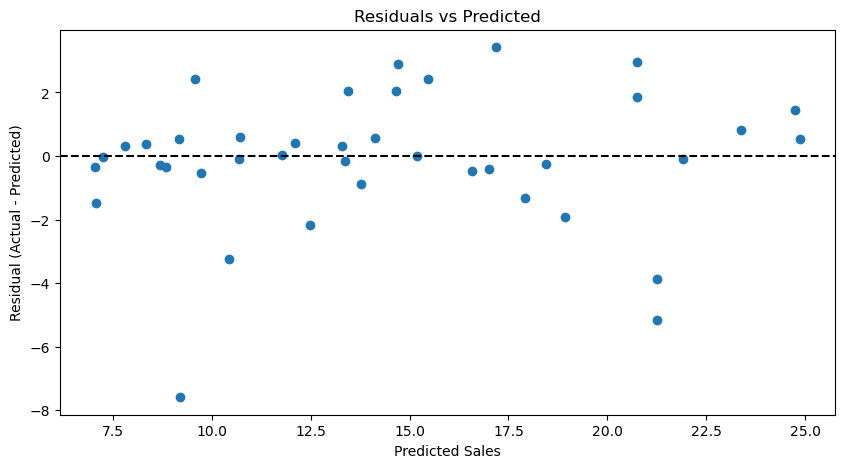

In [16]:
# 4) Visualization - Code
# Visualization: Actual vs Predicted profits (scatter)
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual Sales', alpha=0.7, s=60)
plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted Sales', alpha=0.7, marker='x', s=60)
plt.title('Actual vs Predicted Sales (Test Set)')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.legend()
plt.show()
 
# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution (Actual - Predicted)')
plt.xlabel('Residual')
plt.show()
 
# Residuals vs Predicted (to check heteroscedasticity)
plt.figure(figsize=(10,5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Sales')
plt.ylabel('Residual (Actual - Predicted)')
plt.show()
 

In [17]:
# Evaluation metrics & sample prediction
from sklearn.metrics import  mean_squared_error, r2_score
 
mse = mean_squared_error(y_test, y_pred)
 
r2 = r2_score(y_test, y_pred)
 
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 4.52
R^2 Score: 0.8645


In [ ]:
#Unseen data sample
sample = np.array([[160, 25, 29]])

pred_sample = regressor.predict(sample)
print('\nSample startup predicted sales : ', float(pred_sample[0]))


Sample startup predicted sales :  16.048331738499854


In [19]:
#TV=150 radio=20 newspaper =30
sample = np.array([[150,20,30]])

pred_sample = regressor.predict(sample)
print('\nSample startup predicted sales : ', float(pred_sample[0]))


Sample startup predicted sales :  14.950388344297032
